# <u> **COVID Analysis** </u>

*In this notebook, I did some analysis of covid data by using pandas and matplotlib libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

<br></br>
## Read Data

In [2]:
covid_data = pd.read_csv('covid19.csv')
covid_data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,7,7,7,7,7,7,9,15,15,15
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,589,690,745,820,1054,1054,1133,1265,1451,1451
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,329,407,424,482,532,571,663,736,770,822
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,62,71,77,78,80,84,87,91,93,96
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580


<br></br>
## Aggregate Country Counts
Some countries have data for Provinces/States, let's just sum all of those so we have the total country counts

In [3]:
covid_summed = covid_data.groupby('Country/Region').sum()
df = covid_summed.drop(['Lat', 'Long', 'Province/State'], axis = 1).reset_index()
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,Albania,0,0,0,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,Algeria,0,0,0,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,Andorra,0,0,0,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,Angola,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


## List out all countries

In [4]:
# These are the country names we can pass into our plotting method
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

<br></br>
## Plot for Confirmed Cases for Countries over Time

In [5]:
countries_to_plot = ['US', 'China', 'United Kingdom', 'Germany', 'India']

# US Date format: 'MM/DD/YYYY'
start_date = '01/22/2020'
end_date = '04/05/2020'

C:\Users\Kalapi\AppData\Local\Temp\ipykernel_10556\4200027629.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  y_values = [int(country_df[col]) for col in x_values]


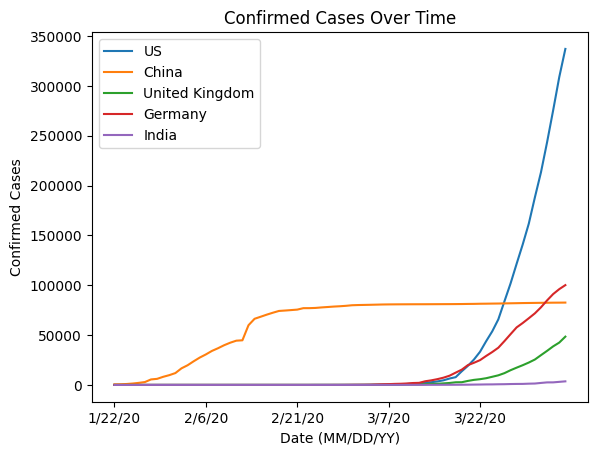

In [6]:
def get_index_from_date(date_string):
    FIRST_DATE = datetime.datetime(2020, 1, 22) # Don't modify this value
    
    date_list = [int(x) for x in date_string.split('/')]
    date_object = datetime.datetime(date_list[-1], date_list[0], date_list[1])
    
    return (date_object-FIRST_DATE).days

dates = list(df)[1:]

start_index = get_index_from_date(start_date)
end_index = get_index_from_date(end_date)

x_values = dates[start_index:end_index+1]

for country in countries_to_plot:
    country_df = df[df['Country/Region'] == country]
    y_values = [int(country_df[col]) for col in x_values]
    plt.plot(x_values, y_values, label=country, )

plt.title('Confirmed Cases Over Time')
skip = max(len(x_values)//5, 1) # Helps ensure we don't add too many date tick marks
plt.xticks(x_values[::skip])
plt.xlabel("Date (MM/DD/YY)")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

<br></br>
## Total number of cases represented by bar-chart

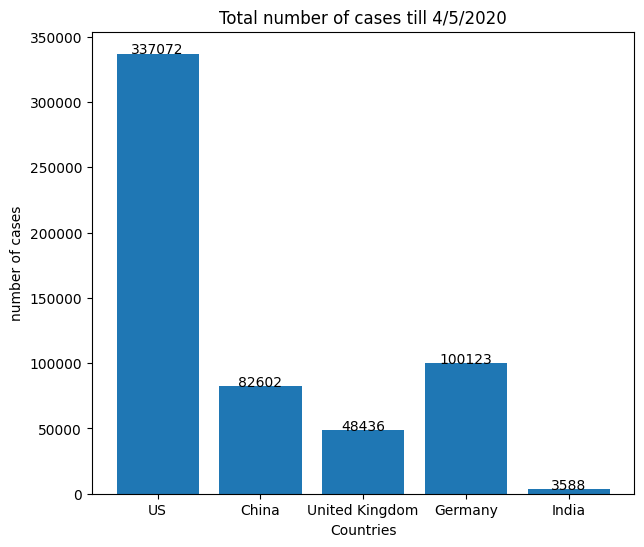

In [7]:
num = [170,36,174,65,78]
number_of_cases = []

for i in num:
    number_of_cases.append(df['4/5/20'][i])

def addtext(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize = (7,6))
plt.title('Total number of cases till 4/5/2020')
plt.bar(countries_to_plot, number_of_cases)

addtext(countries_to_plot, number_of_cases)
plt.xlabel('Countries')
plt.ylabel('number of cases')

plt.show()

<br></br>
## Percentage number of cases represented by pie-chart

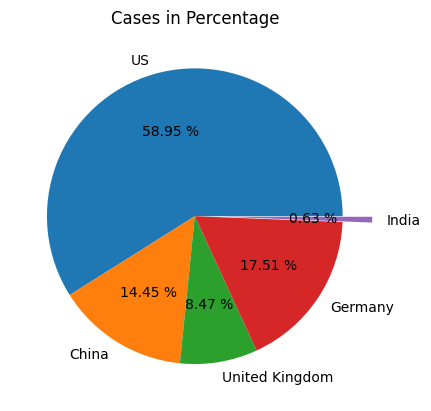

In [8]:
plt.title('Cases in Percentage')
explode = [0,0,0,0,0.2]
plt.pie(number_of_cases, labels = countries_to_plot, explode = explode, autopct = '%.2f %%')

plt.show()

## Box-chart

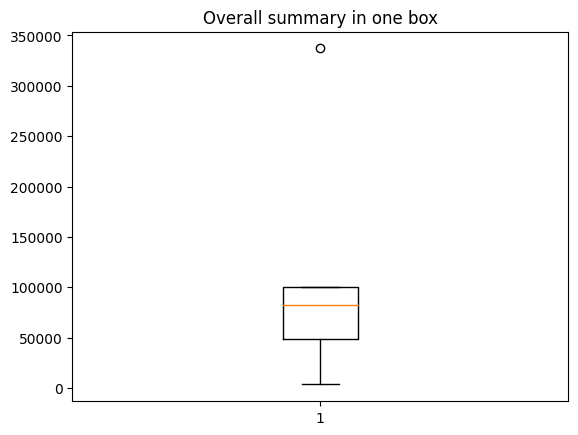

In [9]:
plt.title('Overall summary in one box')
plt.boxplot(number_of_cases)
plt.show()